In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use("default")
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_sub = pd.read_csv("data/sample_submission.csv")

train.shape, test.shape, sample_sub.shape

((28322, 36), (85065, 35), (100, 2))

In [5]:
sample_sub.head(3)

,id,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,0


In [6]:
train.head(2)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1


In [7]:
set(train.columns) - set(test.columns)

{'label'}

In [9]:
train.isna().sum().sum(), test.isna().sum().sum()

(135776, 408161)

In [12]:
train.isna().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

In [13]:
test.isna().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       77322
s55       75644
s56       85065
s57       85065
s58           0
s59       85065
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
dtype: int64

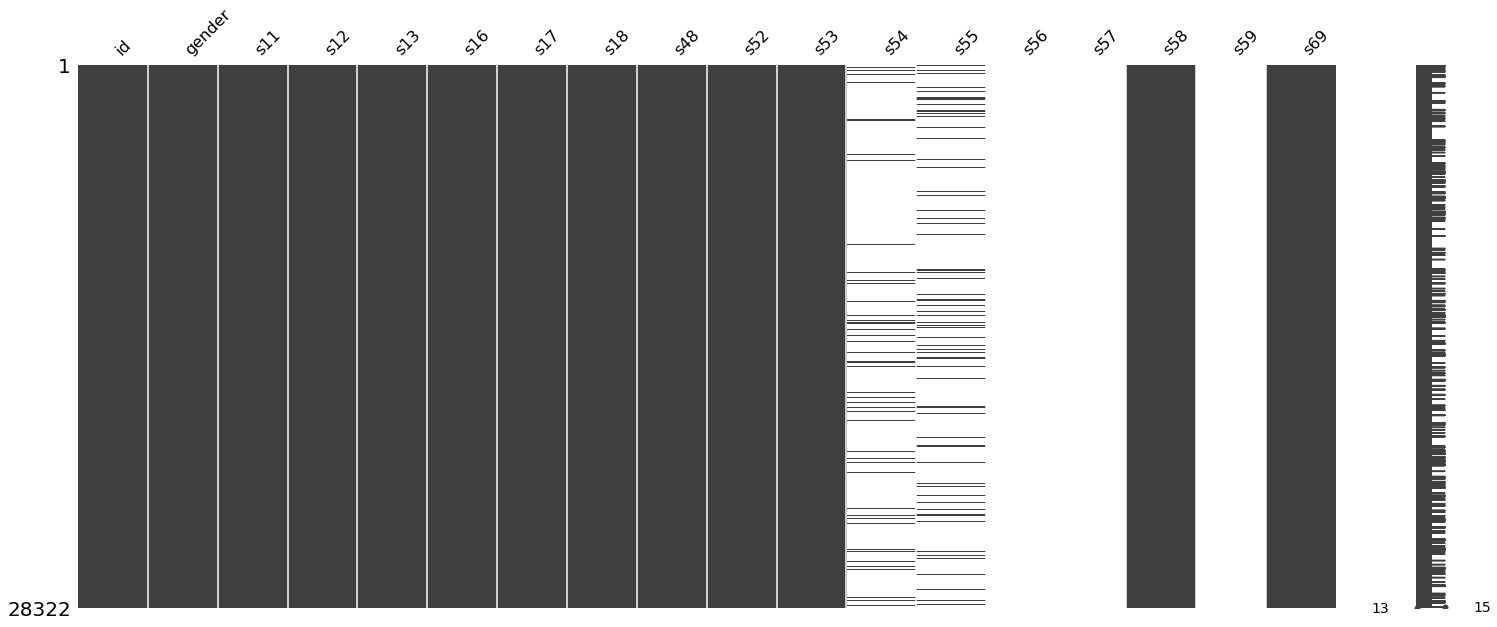

In [41]:
msno.matrix(train.iloc[:, :18]);

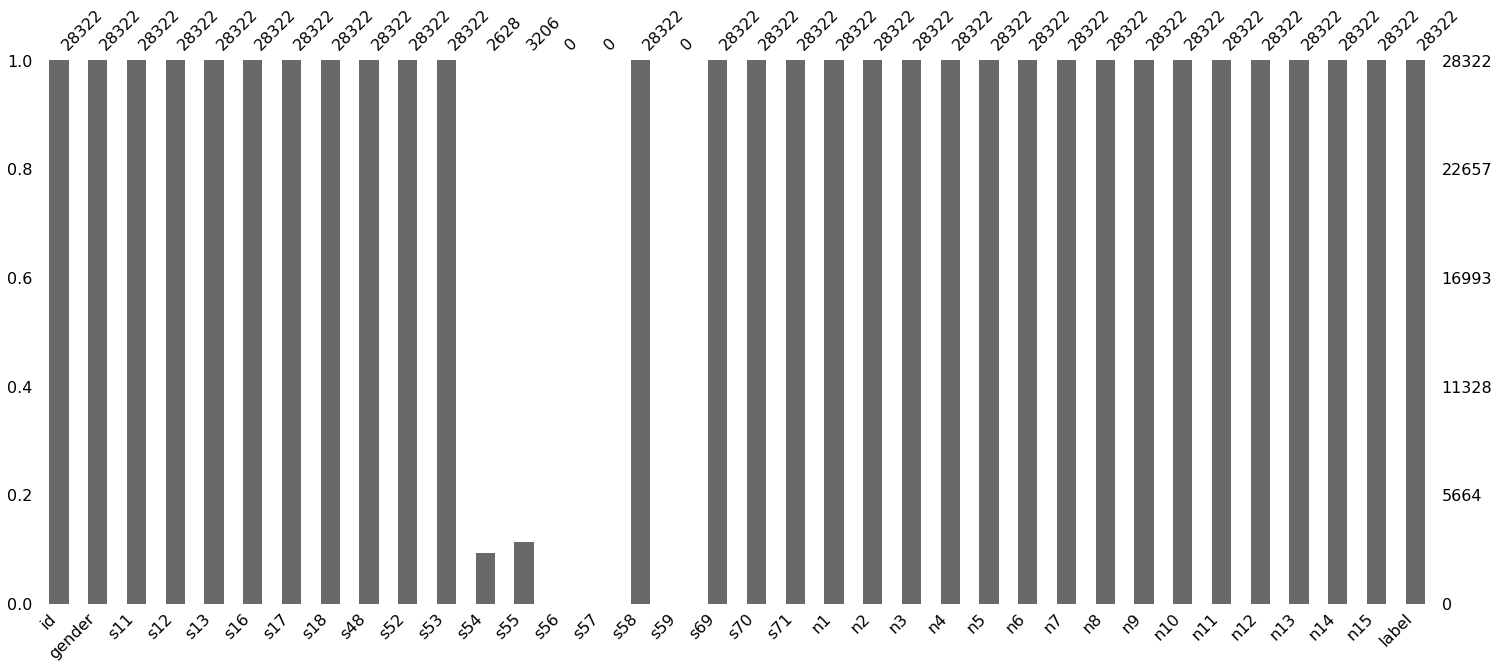

In [43]:
msno.bar(train);

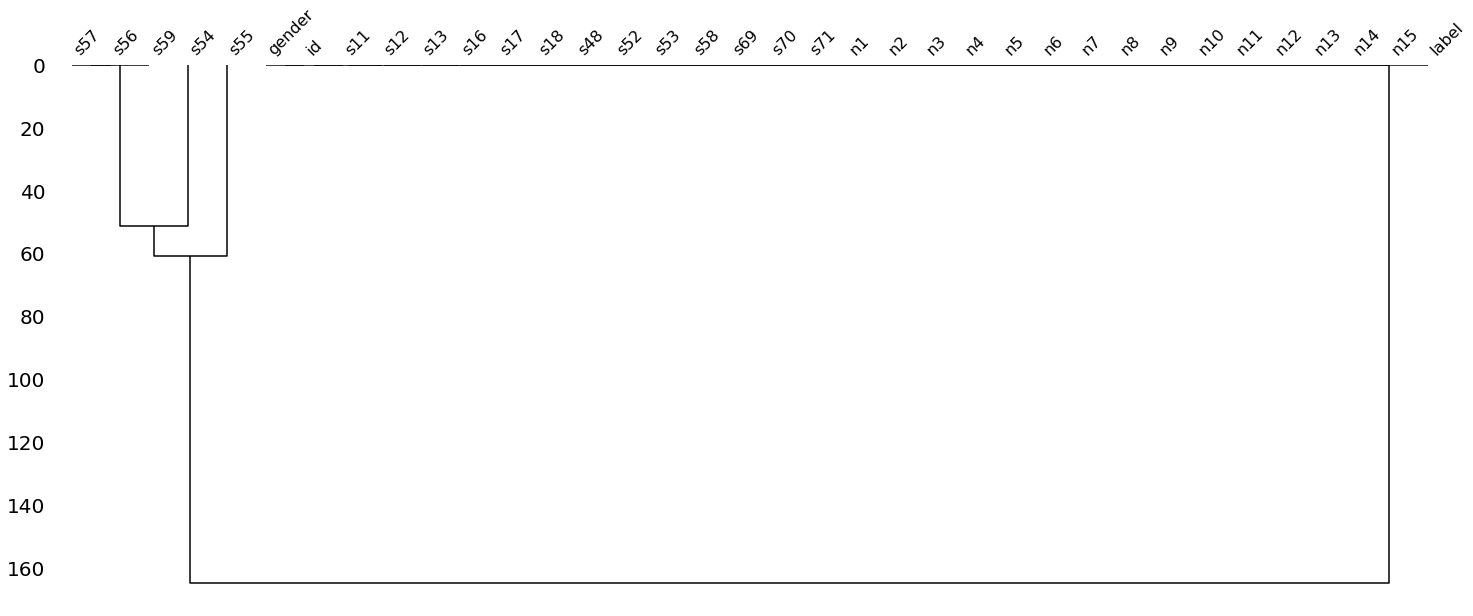

In [44]:
msno.dendrogram(train);

In [4]:
df_train = train.copy()
df_test = test.copy()

df_train.shape, df_test.shape

((28322, 36), (85065, 35))

In [5]:
drop_cols = ["s54", "s55", "s56", "s57", "s59"]
df_train.drop(drop_cols, axis=1, inplace=True)
df_test.drop(drop_cols, axis=1, inplace=True)

df_train.shape, df_test.shape

((28322, 31), (85065, 30))

In [23]:
df_train["label"].value_counts()

0    23562
1     4760
Name: label, dtype: int64

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  object 
 2   s11     28322 non-null  object 
 3   s12     28322 non-null  object 
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  object 
 6   s17     28322 non-null  object 
 7   s18     28322 non-null  object 
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  object 
 10  s53     28322 non-null  object 
 11  s58     28322 non-null  object 
 12  s69     28322 non-null  object 
 13  s70     28322 non-null  object 
 14  s71     28322 non-null  object 
 15  n1      28322 non-null  float64
 16  n2      28322 non-null  float64
 17  n3      28322 non-null  int64  
 18  n4      28322 non-null  float64
 19  n5      28322 non-null  float64
 20  n6      28322 non-null  float64
 21  n7      28322 non-null  float64
 22

In [26]:
df_train.describe(include=["O"])

,id,gender,s11,s12,s16,s17,s18,s52,s53,s58,s69,s70,s71
count,28322,28322,28322,28322,28322,28322,28322,28322,28322,28322,28322,28322,28322
unique,28322,2,2,2,4,4,4,4,2,2,4,4,4
top,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,Y,D,D,B,1,,B,x,op: D,b
freq,1,20396,25112,24227,21028,24013,25010,20524,25752,25760,21028,24013,25010


In [6]:
cat_cols = df_train.select_dtypes(include=["object"]).columns
len(cat_cols), cat_cols

(13,
 Index(['id', 'gender', 's11', 's12', 's16', 's17', 's18', 's52', 's53', 's58',
        's69', 's70', 's71'],
       dtype='object'))

In [7]:
num_cols = df_train.select_dtypes(exclude=["object"]).columns
len(num_cols), num_cols

(18,
 Index(['s13', 's48', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9',
        'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
       dtype='object'))

#### <span style="color: yellow">Duplicate Row?</span>

In [45]:
df_train[df_train.duplicated()].shape

(0, 31)

In [46]:
df_test[df_test.duplicated()].shape

(0, 30)

### Categorical Columns

#### 1. cat_cols[0] = `gender`

In [8]:
df_train["gender"].describe()

count     28322
unique        2
top           M
freq      20396
Name: gender, dtype: object

In [39]:
df_train["gender"].unique()

array(['M', 'F'], dtype=object)

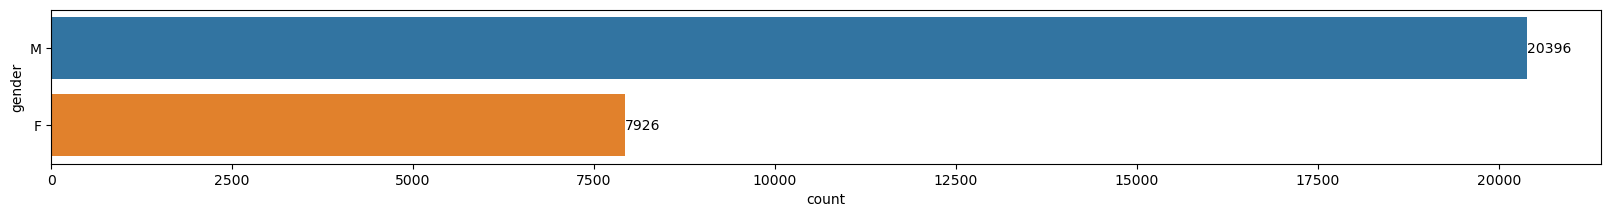

In [10]:
plt.figure(figsize=(20, 2))
ax = sns.countplot(y="gender", data=df_train)
ax.bar_label(ax.containers[0]);

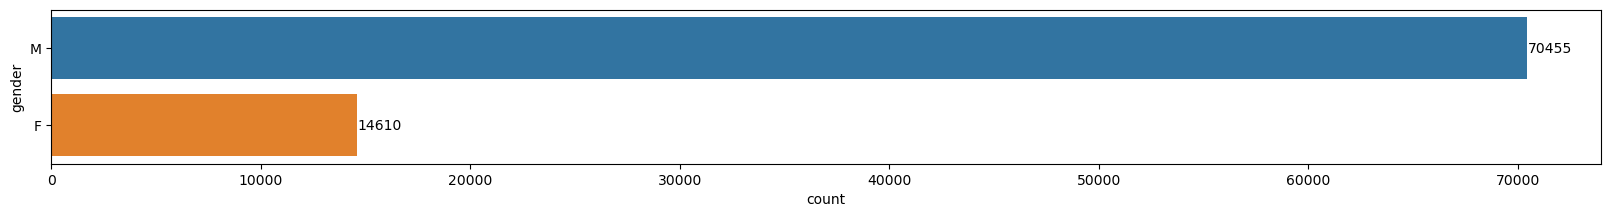

In [11]:
plt.figure(figsize=(20, 2))
ax = sns.countplot(y="gender", data=df_test)
ax.bar_label(ax.containers[0]);

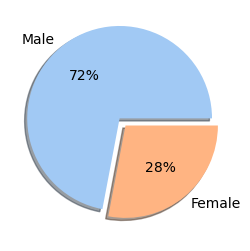

In [60]:
plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(df_train["gender"].value_counts(), labels=["Male", "Female"],
        autopct="%.0f%%", shadow=True, explode=[0.1, 0], colors = colors);

#### 2. `s11`

In [62]:
cat_cols[2]

's11'

In [63]:
df_train["s11"].describe()

count     28322
unique        2
top           Y
freq      25112
Name: s11, dtype: object

In [64]:
df_train["s11"].unique()

array(['Y', 'N'], dtype=object)

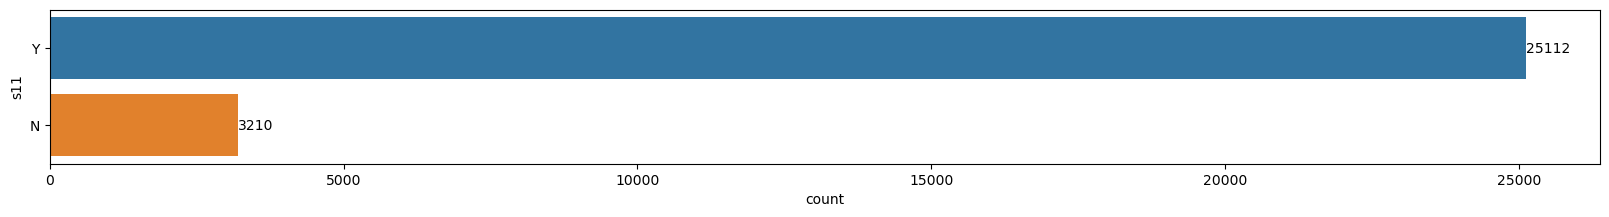

In [12]:
plt.figure(figsize=(20, 2))
ax = sns.countplot(y="s11", data=df_train)
ax.bar_label(ax.containers[0]);

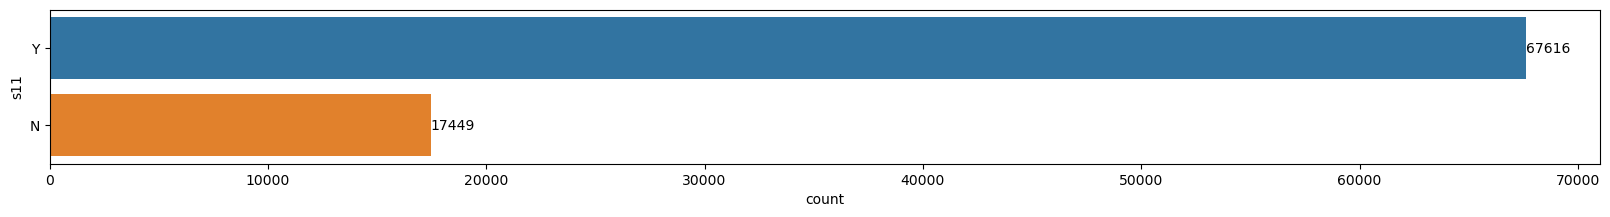

In [13]:
plt.figure(figsize=(20, 2))
ax = sns.countplot(y="s11", data=df_test)
ax.bar_label(ax.containers[0]);

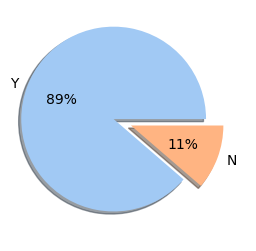

In [68]:
plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(df_train["s11"].value_counts(), labels=["Y", "N"],
        autopct="%.0f%%", shadow=True, explode=[0.2, 0], colors = colors);

#### 3. `s12`

In [69]:
cat_cols[3]

's12'

In [70]:
df_train["s12"].describe()

count     28322
unique        2
top           Y
freq      24227
Name: s12, dtype: object

In [71]:
df_train["s12"].unique()

array(['N', 'Y'], dtype=object)

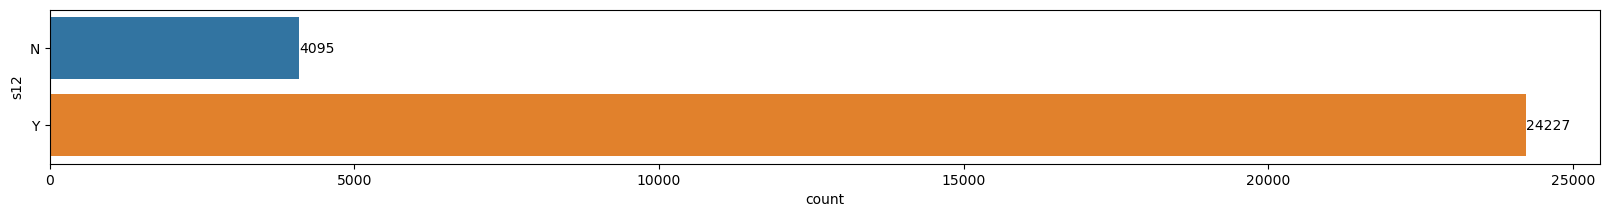

In [14]:
plt.figure(figsize=(20, 2))
ax = sns.countplot(y="s12", data=df_train)
ax.bar_label(ax.containers[0]);

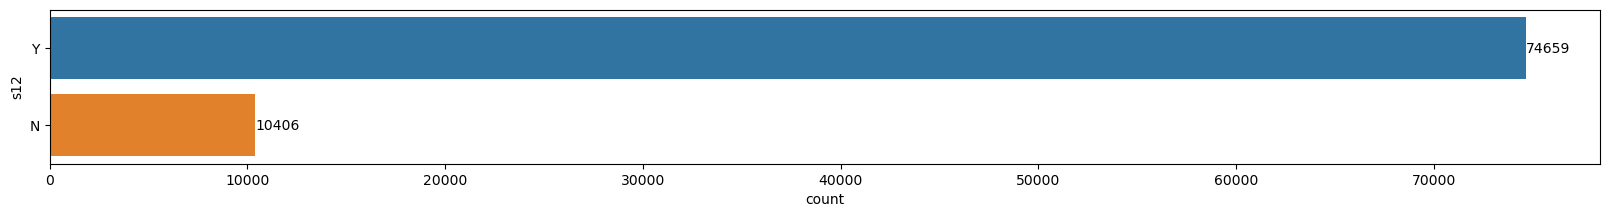

In [15]:
plt.figure(figsize=(20, 2))
ax = sns.countplot(y="s12", data=df_test)
ax.bar_label(ax.containers[0]);

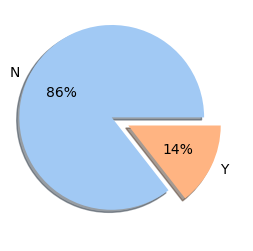

In [74]:
plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(df_train["s12"].value_counts(), labels=["N", "Y"],
        autopct="%.0f%%", shadow=True, explode=[0.2, 0], colors = colors);

#### 4. `s16`

In [75]:
cat_cols[4]

's16'

In [77]:
df_train["s16"].describe()

count     28322
unique        4
top           D
freq      21028
Name: s16, dtype: object

In [80]:
df_train["s16"].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

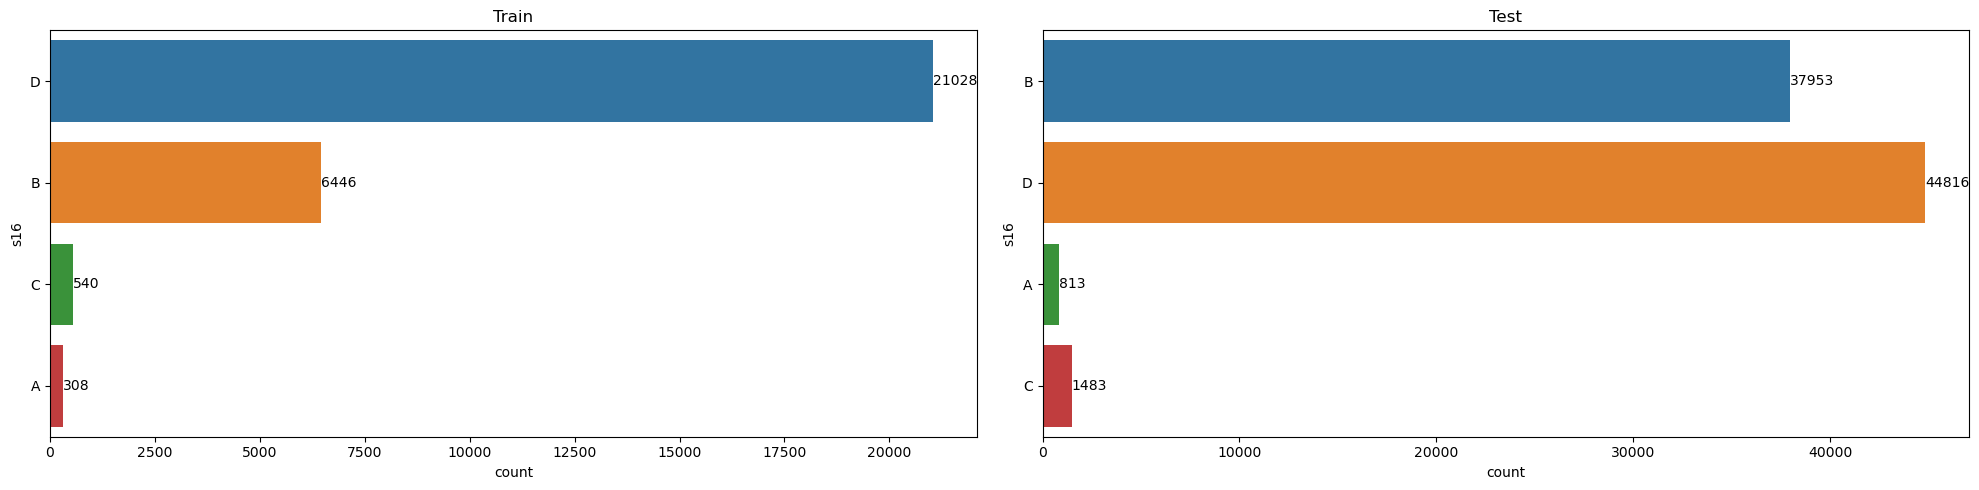

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.countplot(ax=ax1, y="s16", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s16", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

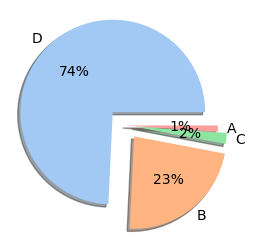

In [103]:
plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(df_train["s16"].value_counts(), labels=["D", "B", "C", "A"],
        autopct="%.0f%%", shadow=True, explode=[0.2, 0.15, 0.1, 0], colors = colors);

#### 5. `s17`

In [104]:
cat_cols[5]

's17'

In [105]:
df_train["s17"].describe()

count     28322
unique        4
top           D
freq      24013
Name: s17, dtype: object

In [106]:
df_train["s17"].unique()

array(['D', 'C', 'B', 'A'], dtype=object)

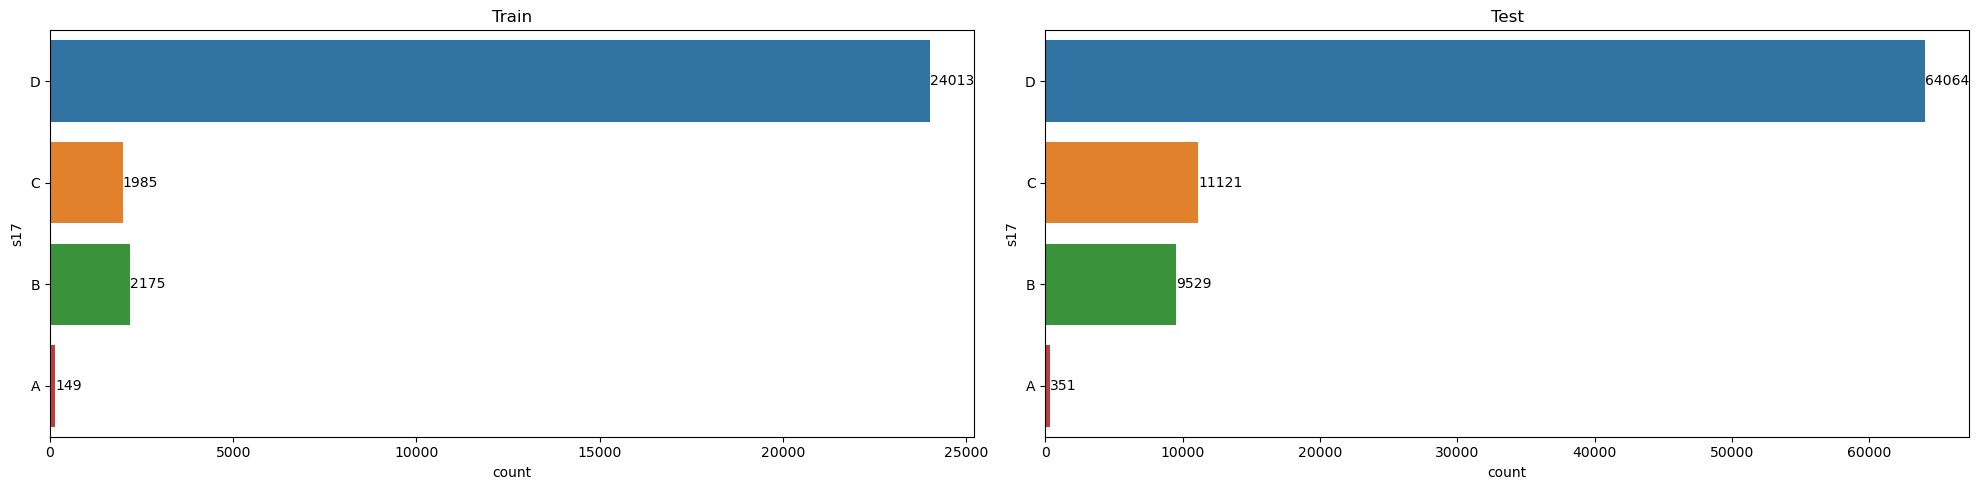

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.countplot(ax=ax1, y="s17", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s17", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

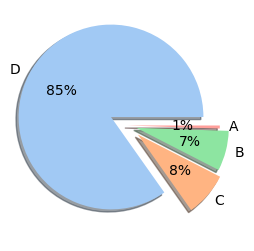

In [108]:
plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(df_train["s17"].value_counts(), labels=["D", "C", "B", "A"],
        autopct="%.0f%%", shadow=True, explode=[0.2, 0.15, 0.1, 0], colors = colors);

#### 6. `s18`

In [109]:
cat_cols[6]

's18'

In [110]:
df_train["s18"].describe()

count     28322
unique        4
top           B
freq      25010
Name: s18, dtype: object

In [111]:
df_train["s18"].unique()

array(['B', 'D', 'C', 'A'], dtype=object)

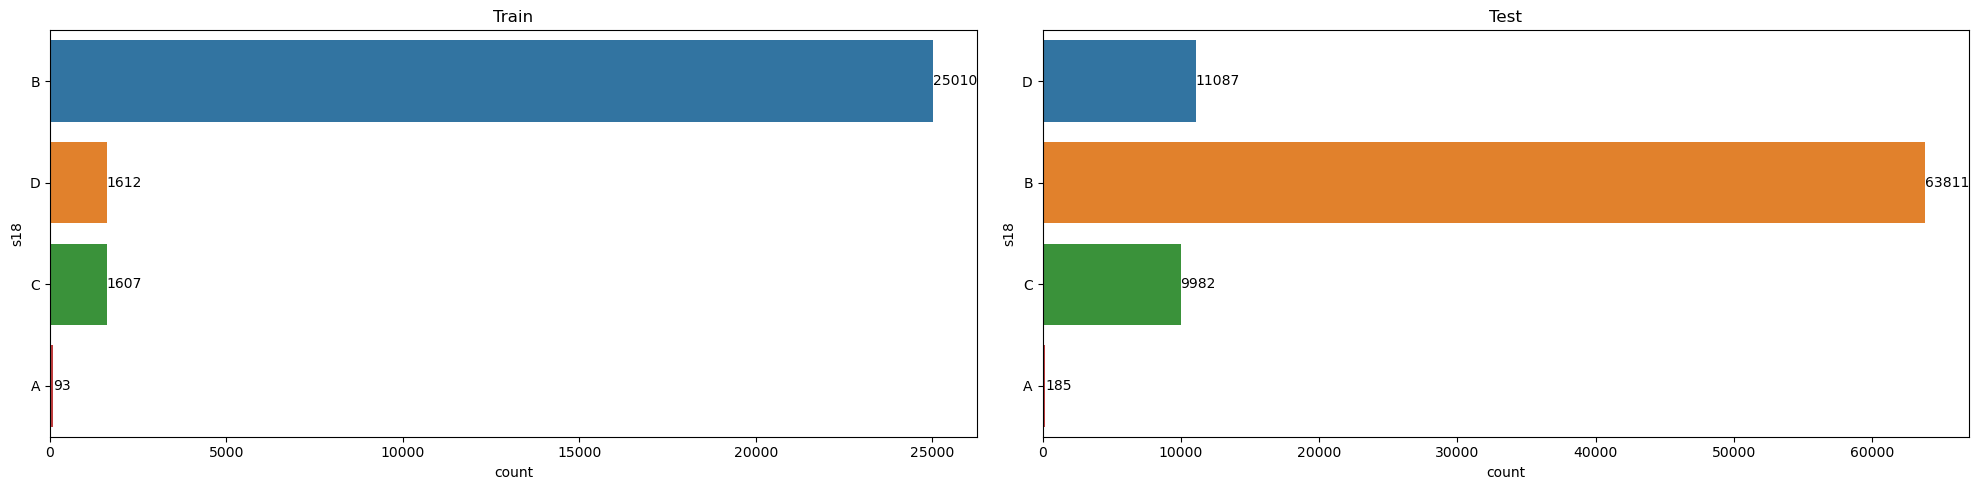

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.countplot(ax=ax1, y="s18", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s18", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

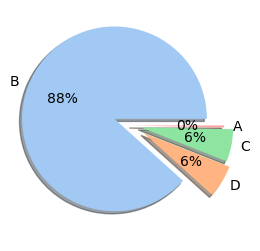

In [113]:
plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(df_train["s18"].value_counts(), labels=["B", "D", "C", "A"],
        autopct="%.0f%%", shadow=True, explode=[0.2, 0.15, 0.1, 0], colors = colors);

#### `s52`

In [114]:
cat_cols[7]

's52'

In [115]:
df_train["s52"].describe()

count     28322
unique        4
top           1
freq      20524
Name: s52, dtype: object

In [116]:
df_train["s52"].unique()

array(['1', 'l', '0', 'o'], dtype=object)

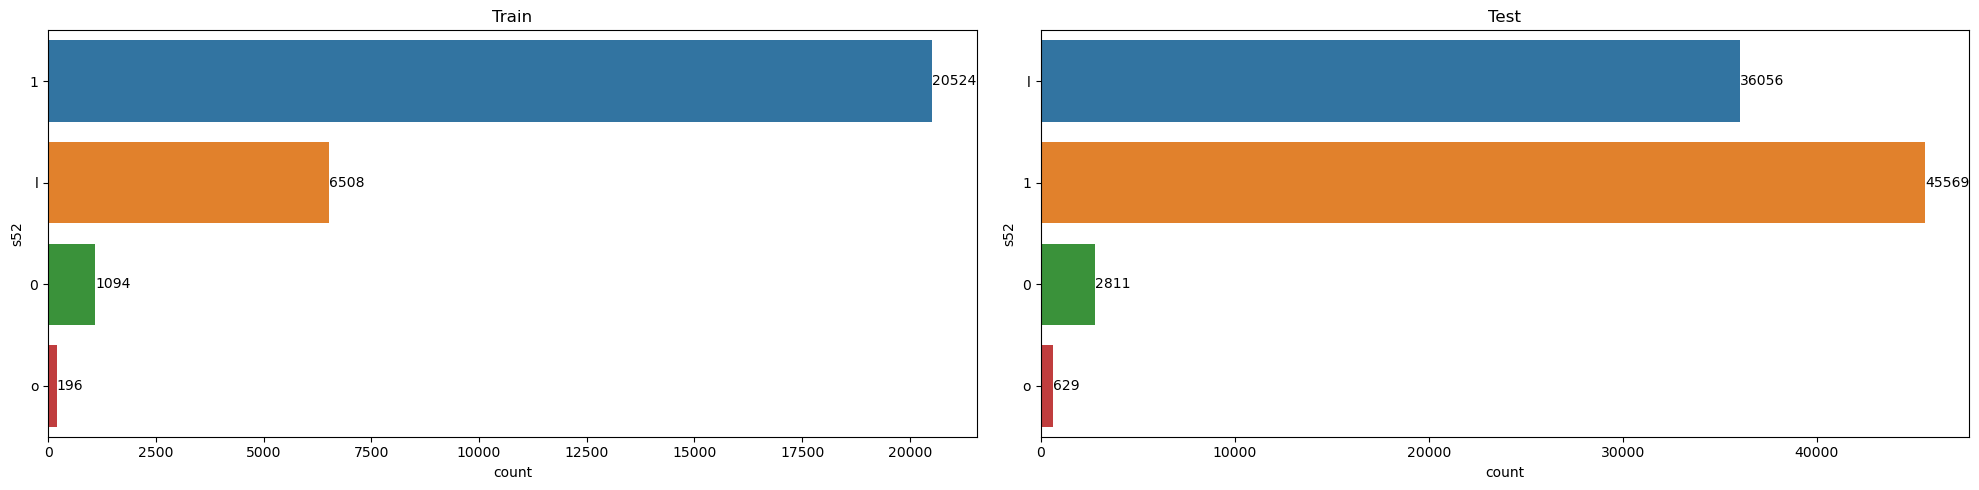

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.countplot(ax=ax1, y="s52", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s52", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

** Comment: drop the column (may be) **

Another thought: may be wrote `l` instead of `1` & `o` instead of `0`. Because `1 & 0` makes sense while `l & o` does not.

#### `s53`

In [118]:
cat_cols[8]

's53'

In [119]:
df_train["s53"].describe()

count     28322
unique        2
top            
freq      25752
Name: s53, dtype: object

In [120]:
df_train["s53"].unique()

array(['  ', ' '], dtype=object)

In [26]:
df_test["s53"].unique()

array(['  ', ' '], dtype=object)

##### Drop the column

#### `s58`

In [121]:
cat_cols[9]

's58'

In [122]:
df_train["s58"].describe()

count     28322
unique        2
top           B
freq      25760
Name: s58, dtype: object

In [123]:
df_train["s58"].unique()

array(['B', 'A'], dtype=object)

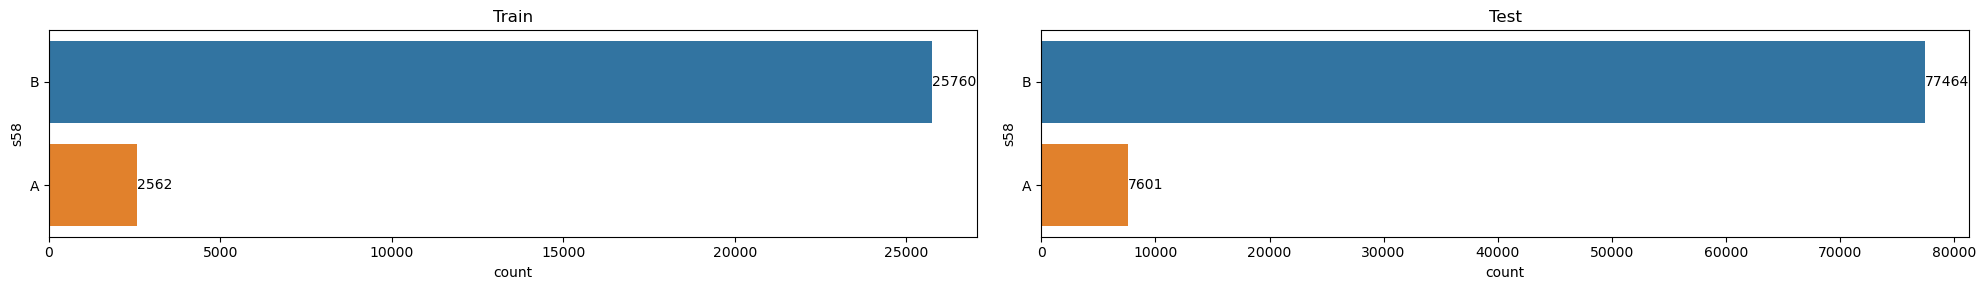

In [28]:
ig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 3))

sns.countplot(ax=ax1, y="s58", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s58", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

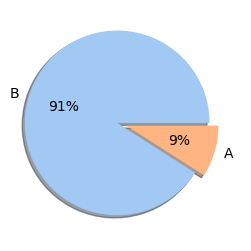

In [126]:
plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(df_train["s58"].value_counts(), labels=["B", "A"],
        autopct="%.0f%%", shadow=True, explode=[0.1, 0], colors = colors);

#### `s69`

In [127]:
cat_cols[10]

's69'

In [128]:
df_train["s69"].describe()

count     28322
unique        4
top           x
freq      21028
Name: s69, dtype: object

In [129]:
df_train["s69"].unique()

array(['x', '~1', 'C`', '0'], dtype=object)

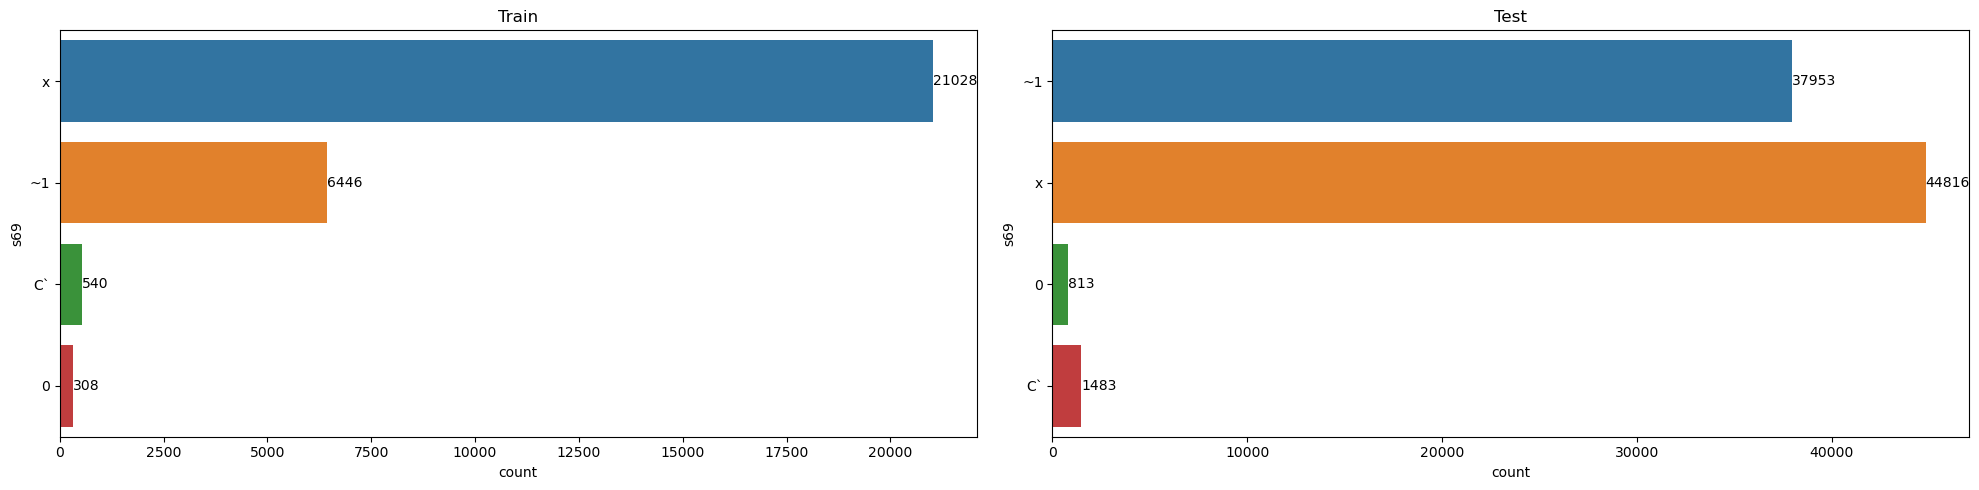

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.countplot(ax=ax1, y="s69", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s69", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

#### `s70`

In [131]:
cat_cols[11]

's70'

In [132]:
df_train["s70"].describe()

count     28322
unique        4
top       op: D
freq      24013
Name: s70, dtype: object

In [133]:
df_train["s70"].unique()

array(['op: D', 'op: C', 'op: B', 'op: A'], dtype=object)

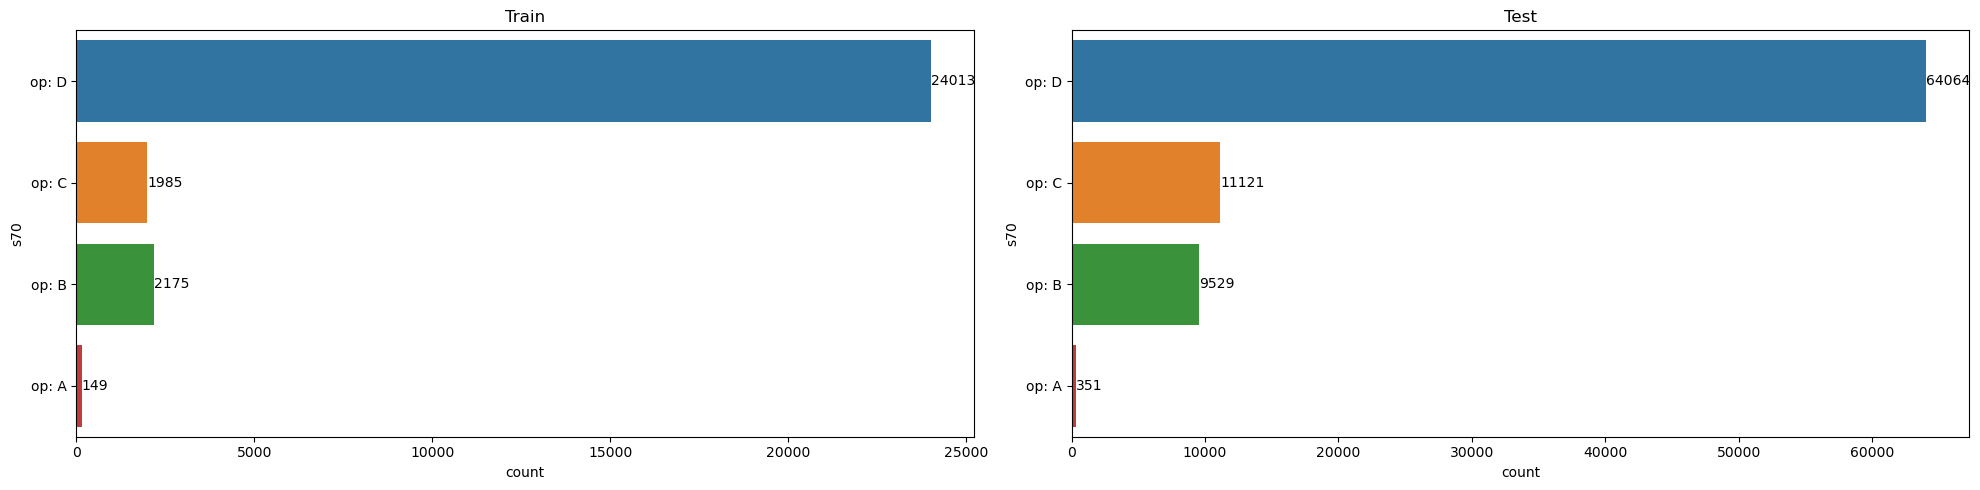

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.countplot(ax=ax1, y="s70", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s70", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

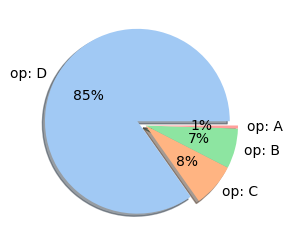

In [135]:
plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(df_train["s70"].value_counts(), labels=['op: D', 'op: C', 'op: B', 'op: A'],
        autopct="%.0f%%", shadow=True, explode=[0.1, 0, 0, 0], colors = colors);

#### `s71`

In [138]:
cat_cols[12]

's71'

In [139]:
df_train["s71"].describe()

count     28322
unique        4
top           b
freq      25010
Name: s71, dtype: object

In [140]:
df_train["s71"].unique()

array(['b', 'd', 'c', 'a'], dtype=object)

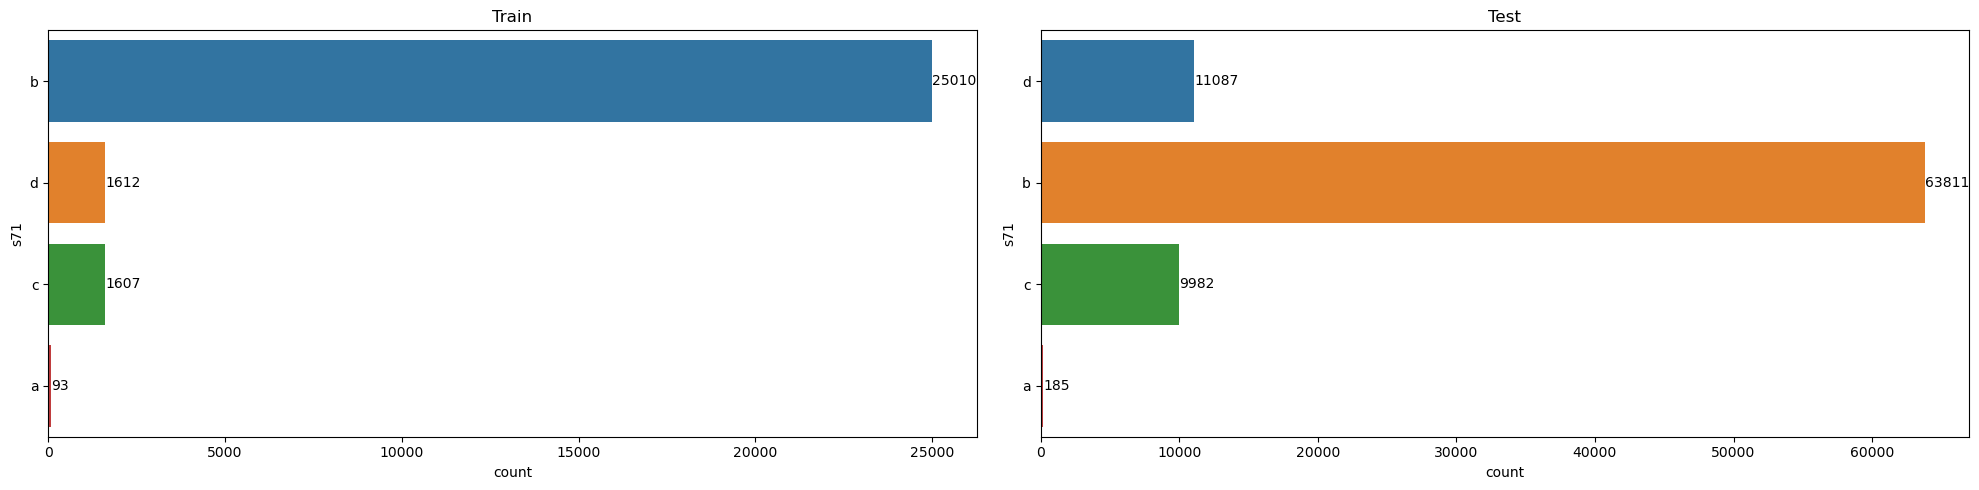

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.countplot(ax=ax1, y="s71", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s71", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

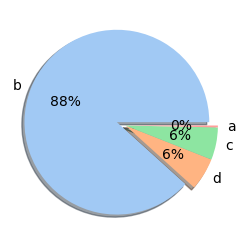

In [142]:
plt.figure(figsize=(3,3))
colors = sns.color_palette("pastel")
plt.pie(df_train["s71"].value_counts(), labels=['b', 'd', 'c', 'a'],
        autopct="%.0f%%", shadow=True, explode=[0.1, 0, 0, 0], colors = colors);

### Numeric Columns

In [33]:
len(num_cols), num_cols

(18,
 Index(['s13', 's48', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9',
        'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
       dtype='object'))

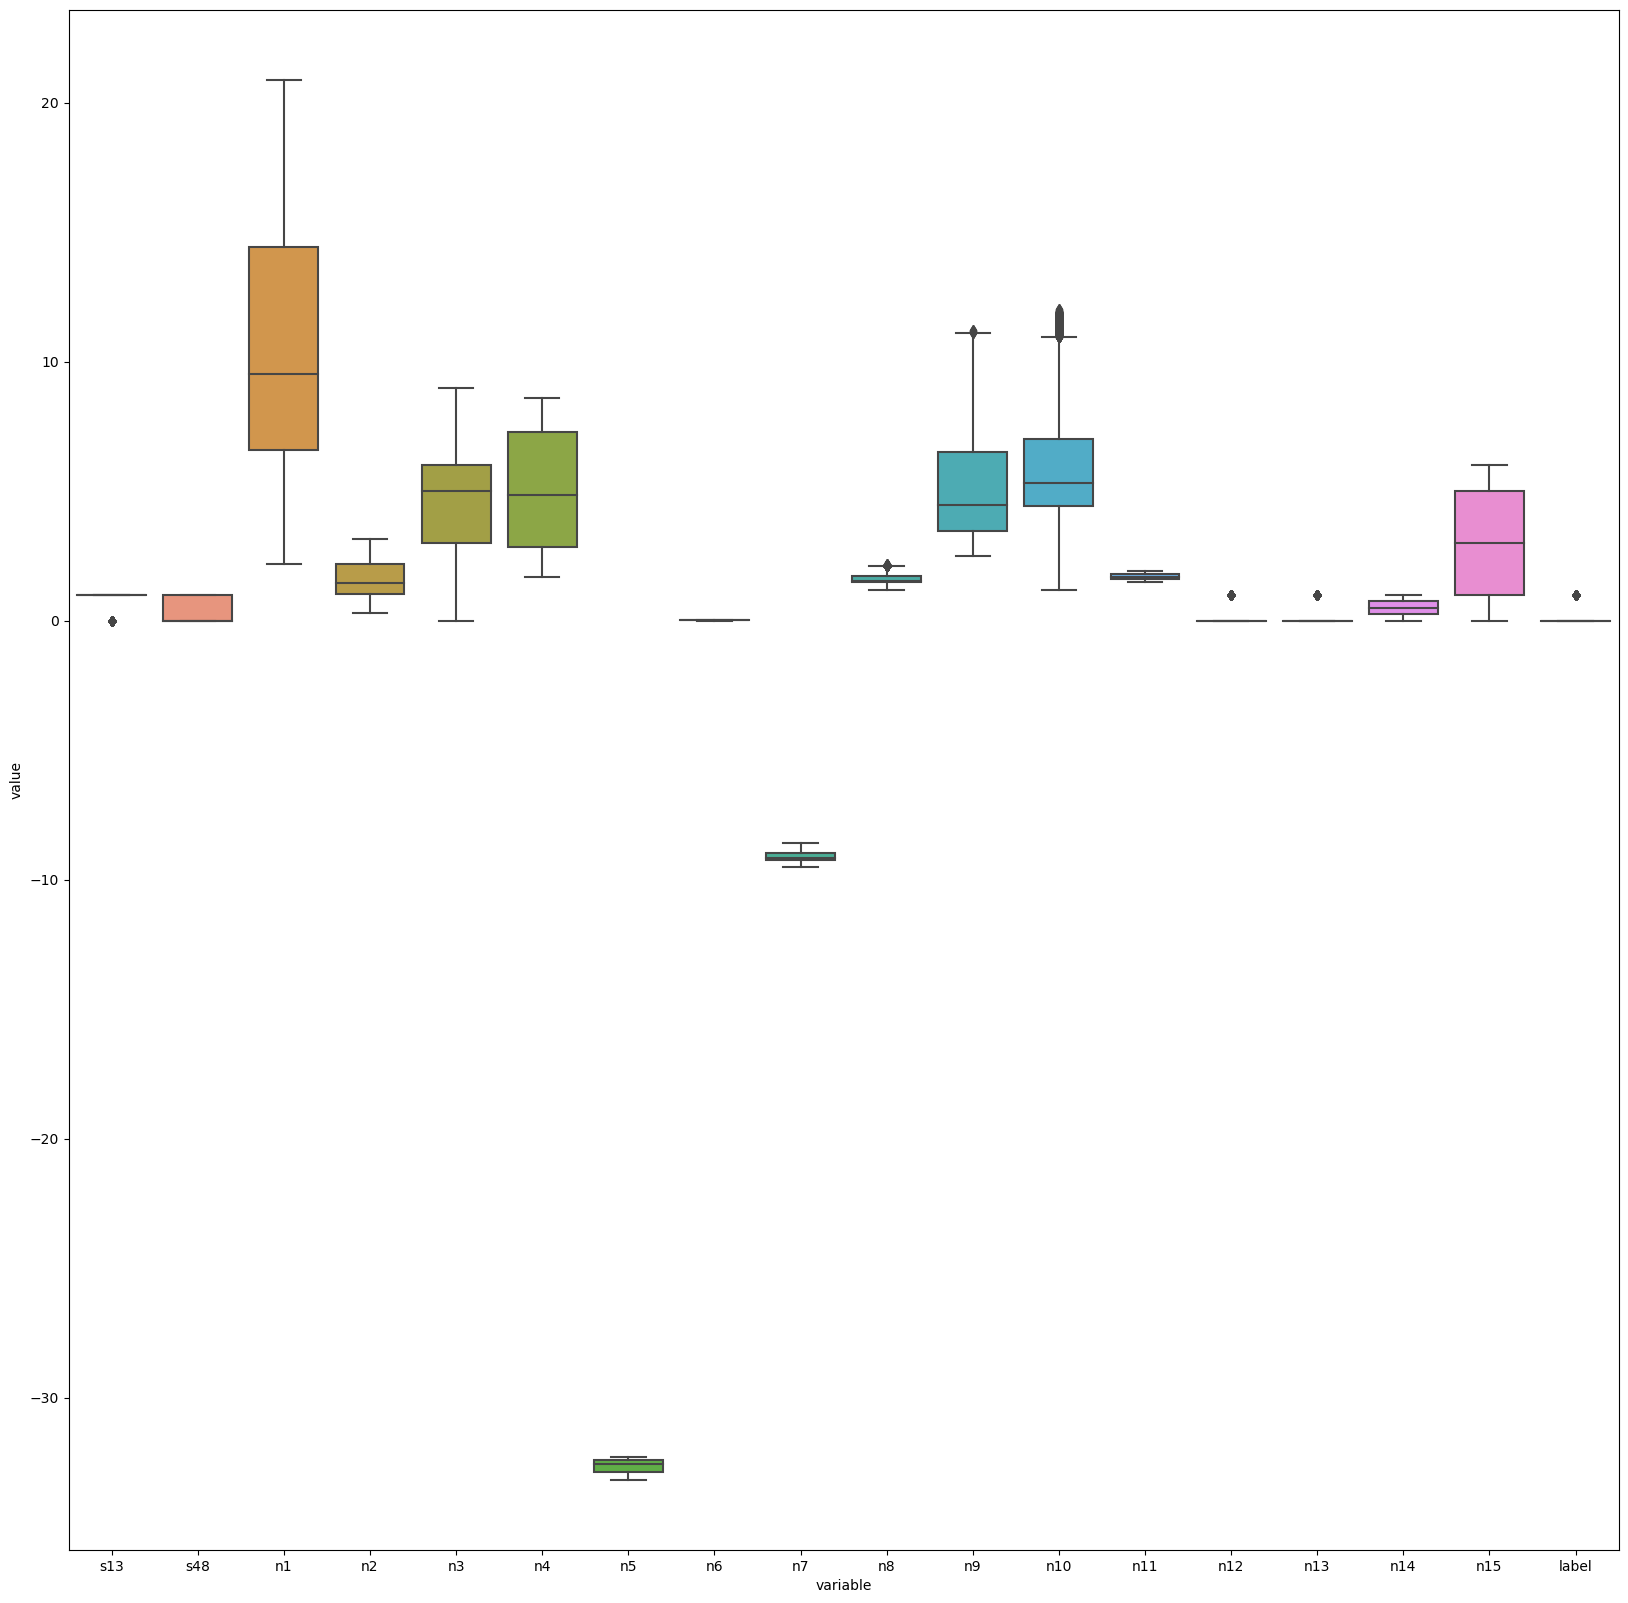

In [47]:
plt.figure(figsize=(20, 20))
sns.boxplot(x="variable", y="value", data=pd.melt(df_train[num_cols]));

In [52]:
df_train["s13"].unique(), df_test["s13"].unique()

(array([1, 0], dtype=int64), array([1, 0], dtype=int64))

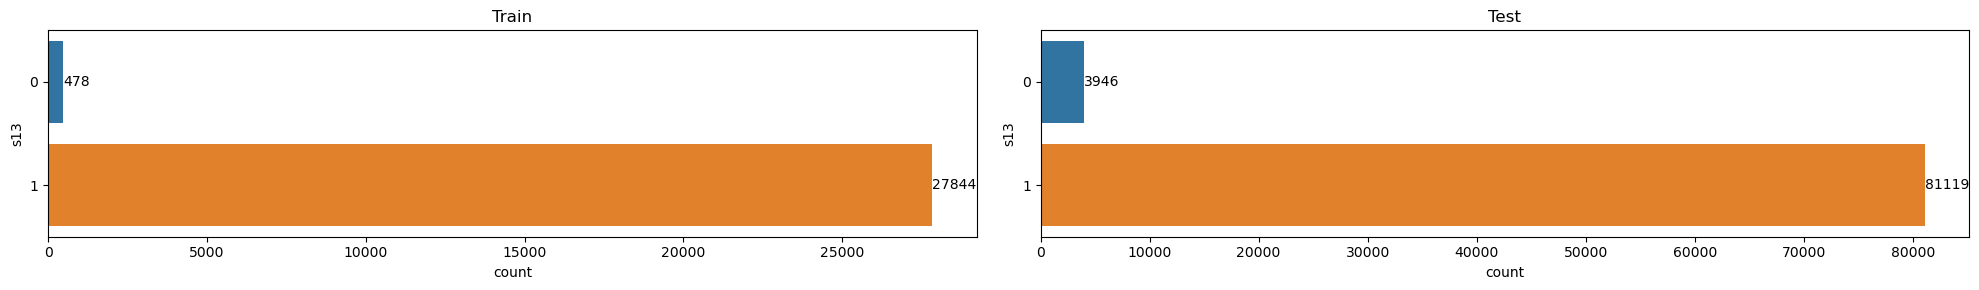

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 3))

sns.countplot(ax=ax1, y="s13", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s13", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

In [55]:
df_train["s48"].unique(), df_test["s48"].unique()

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

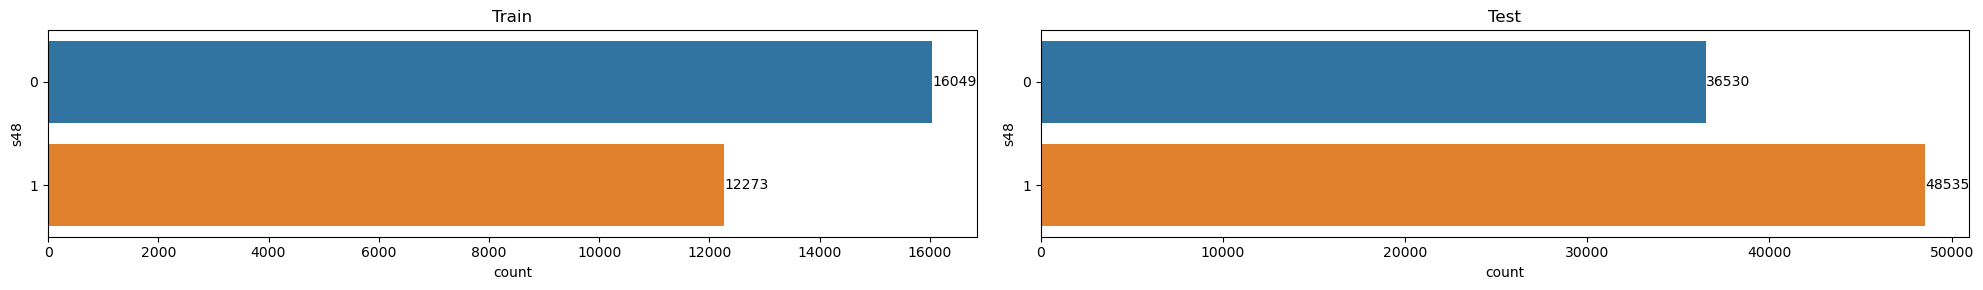

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 3))

sns.countplot(ax=ax1, y="s48", data=df_train).set_title("Train")
ax1.bar_label(ax1.containers[0])

sns.countplot(ax=ax2, y="s48", data=df_test).set_title("Test")
ax2.bar_label(ax2.containers[0])

plt.tight_layout();

In [60]:
# num_cols[2]
df_train["n1"].describe()

count    28322.000000
mean        10.201863
std          4.414660
min          2.200736
25%          6.592127
50%          9.535961
75%         14.432580
max         20.882733
Name: n1, dtype: float64

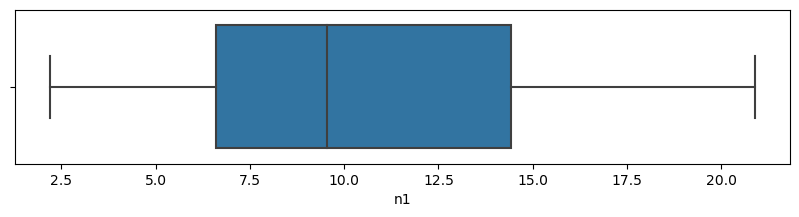

In [65]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df_train["n1"]);

### Numeric Columns: 4

In [67]:
num_cols[3]

'n2'

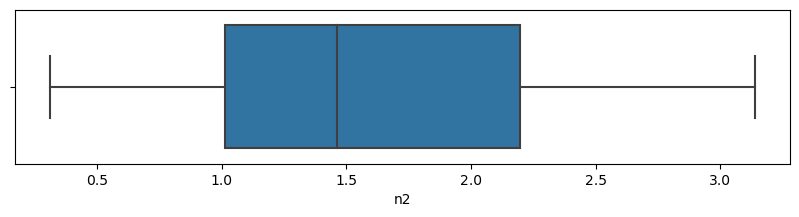

In [68]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df_train["n2"]);

In [14]:
def boxplot(col_name, df=df_train):
    plt.figure(figsize=(10,1))
    sns.boxplot(x=df[col_name]);

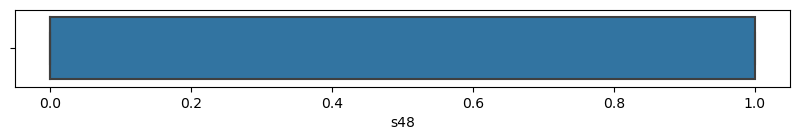

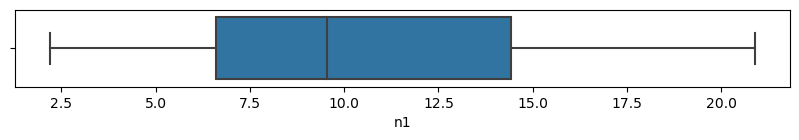

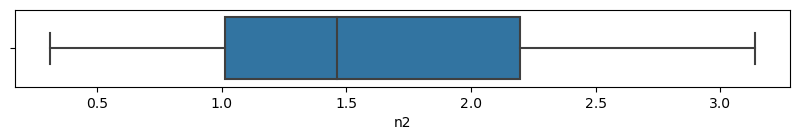

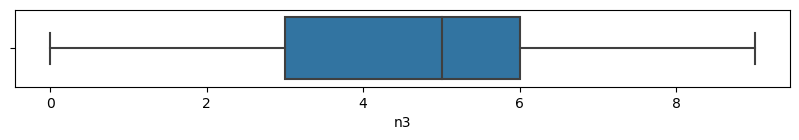

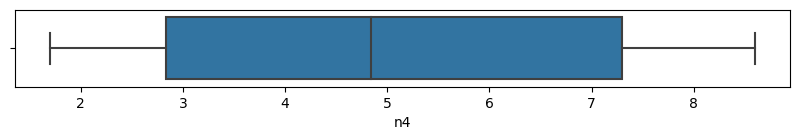

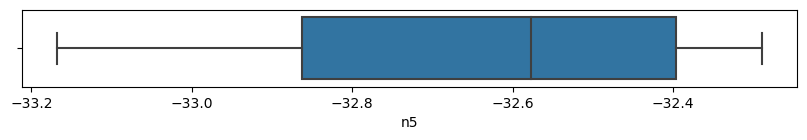

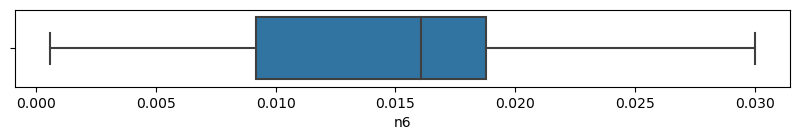

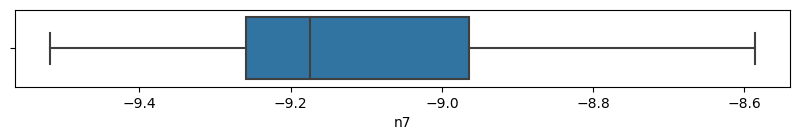

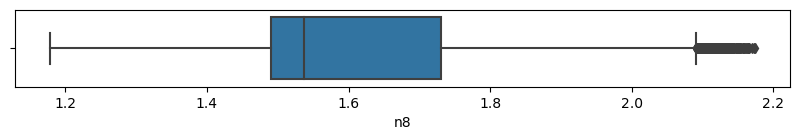

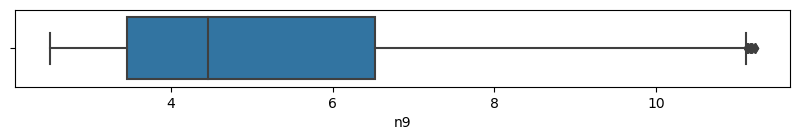

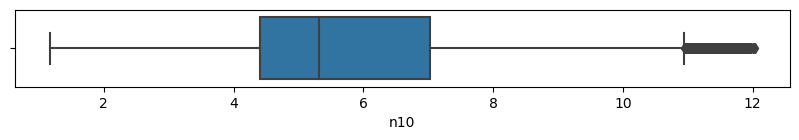

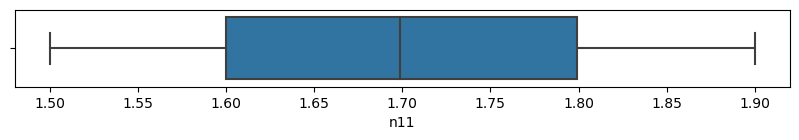

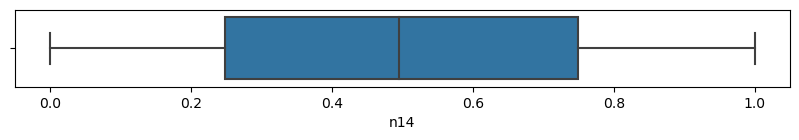

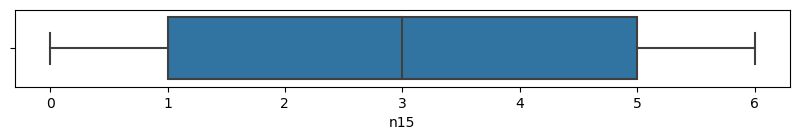

In [75]:
for col in num_cols:
    if col not in ["s13", "n12", "n13", "label"]:
        boxplot(col)

#### observation: `n8, n9 & n10` have outliers

In [8]:
def remove_outlier(df, col_name):
    Q1 = np.percentile(df[col_name], 0.25)
    Q3 = np.percentile(df[col_name], 0.75)
    IQR = Q3 - Q1
    
    # df[~(df[col_name] < (Q1 - 1.5*IQR)) | (df[col_name] < (Q1 + 1.5*IQR))]
    df.drop(df[df[col_name] < (Q1 - 1.5*IQR)].index, inplace=True)
    df.drop(df[df[col_name] < (Q3 + 1.5*IQR)].index, inplace=True)

In [33]:
df_train2 = df_train.copy()

In [78]:
df_train.shape

(28322, 31)

In [34]:
remove_outlier(df_train2, "n8")
X.shape

(25402, 31)

In [35]:
remove_outlier(df_train2, "n9")
X.shape

(25402, 31)

In [36]:
remove_outlier(df_train2, "n10")
X.shape

(25402, 31)

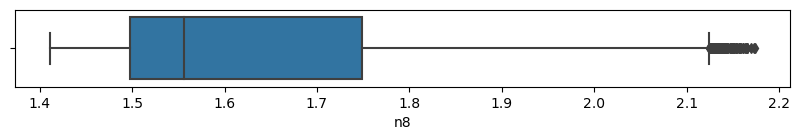

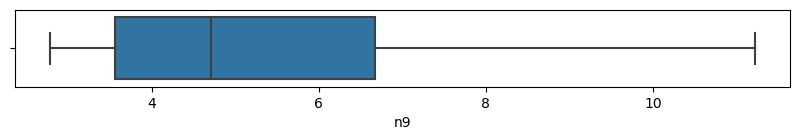

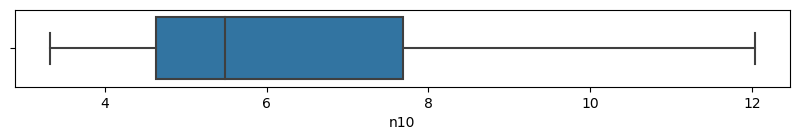

In [37]:
for col in ["n8", "n9", "n10"]:
    boxplot(col, df_train2)

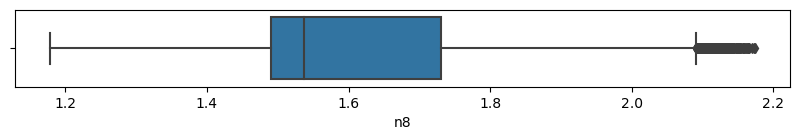

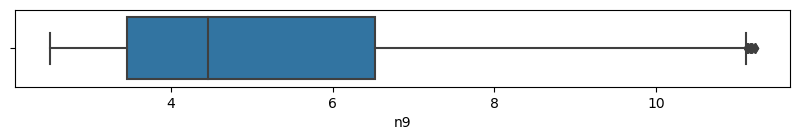

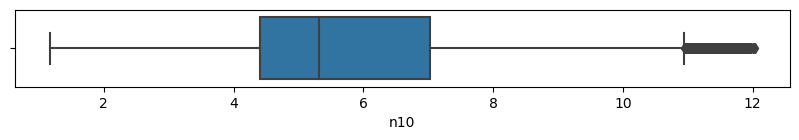

In [97]:
for col in ["n8", "n9", "n10"]:
    boxplot(col, df_train)

In [38]:
# label = column name(key), content = values in the column
df_train3 = df_train2.drop("id", axis=1)

for label, content in df_train3.items():
    if pd.api.types.is_string_dtype(content):
        df_train3[label] = content.astype("category").cat.as_unordered()
        
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25402 entries, 0 to 28321
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  25402 non-null  category
 1   s11     25402 non-null  category
 2   s12     25402 non-null  category
 3   s13     25402 non-null  int64   
 4   s16     25402 non-null  category
 5   s17     25402 non-null  category
 6   s18     25402 non-null  category
 7   s48     25402 non-null  int64   
 8   s52     25402 non-null  category
 9   s53     25402 non-null  category
 10  s58     25402 non-null  category
 11  s69     25402 non-null  category
 12  s70     25402 non-null  category
 13  s71     25402 non-null  category
 14  n1      25402 non-null  float64 
 15  n2      25402 non-null  float64 
 16  n3      25402 non-null  int64   
 17  n4      25402 non-null  float64 
 18  n5      25402 non-null  float64 
 19  n6      25402 non-null  float64 
 20  n7      25402 non-null  float64 
 21  n8      2540

In [39]:
df_train3.drop("s53", axis=1, inplace=True) #s69
df_train3.shape

(25402, 29)

In [40]:
df_train3.gender.cat.categories

Index(['F', 'M'], dtype='object')

In [41]:
pd.Categorical(df_train3["gender"])

['M', 'M', 'M', 'F', 'M', ..., 'M', 'M', 'F', 'M', 'M']
Length: 25402
Categories (2, object): ['F', 'M']

In [42]:
df_train3.gender.cat.codes

0        1
1        1
2        1
3        0
4        1
        ..
28317    1
28318    1
28319    0
28320    1
28321    1
Length: 25402, dtype: int8

### 👉 Turn categorical variables into numbers

In [43]:
for label, content in df_train3.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers
        df_train3[label] = pd.Categorical(df_train3[label]).codes

In [44]:
df_train2.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [45]:
df_train3.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,1,1,0,1,3,3,1,0,1,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,1,1,1,1,3,3,1,1,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,1,1,1,1,3,3,1,0,1,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,0,1,1,1,3,3,1,0,1,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,1,0,1,1,1,3,3,1,2,1,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [58]:
df_train3.shape

(25402, 29)

### 👏 Building Model

In [32]:
from sklearn.model_selection import train_test_split

In [46]:
X = df_train3.drop("label", axis=1)
y = df_train3["label"]

X.shape

(25402, 28)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
X_train.shape, X_test.shape

((20321, 28), (5081, 28))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [49]:
def model_score(model):
    
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    # print(f"The accuracy score achieved using {model_name} is: {score*100:0.2f} %")
    
    return score

In [70]:
%%time
lr = LogisticRegression()
nb = GaussianNB()
svc = SVC(probability=True)
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

model_desc = {"Logstic Regression": lr, "Naive Bayes": nb, "SVC": svc, "Random Forest": rf, "KNN": knn}
scores = {}

for k, v in model_desc.items():
    scores[k] = model_score(v)

Wall time: 1min 3s


In [71]:
pd.DataFrame(scores.items())

,0,1
0,Logstic Regression,0.872663
1,Naive Bayes,0.849242
2,SVC,0.863216
3,Random Forest,0.879158
4,KNN,0.851998


In [74]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [76]:
%%time
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
auc_lr = auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, nb_threshold = roc_curve(y_test, nb.predict_proba(X_test)[:,1], pos_label=1)
auc_nb = auc(nb_fpr, nb_tpr)

svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc.predict_proba(X_test)[:,1], pos_label=1)
auc_svc = auc(svc_fpr, svc_tpr)

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=1)
auc_rf = auc(rf_fpr, rf_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1], pos_label=1)
auc_knn = auc(knn_fpr, knn_tpr)

auc_lr, auc_nb, auc_svc, auc_rf, auc_knn

Wall time: 5.92 s


(0.8537289768769001,
 0.8465795802448705,
 0.8416500065394892,
 0.8632958491593421,
 0.7812983955563504)

0.21


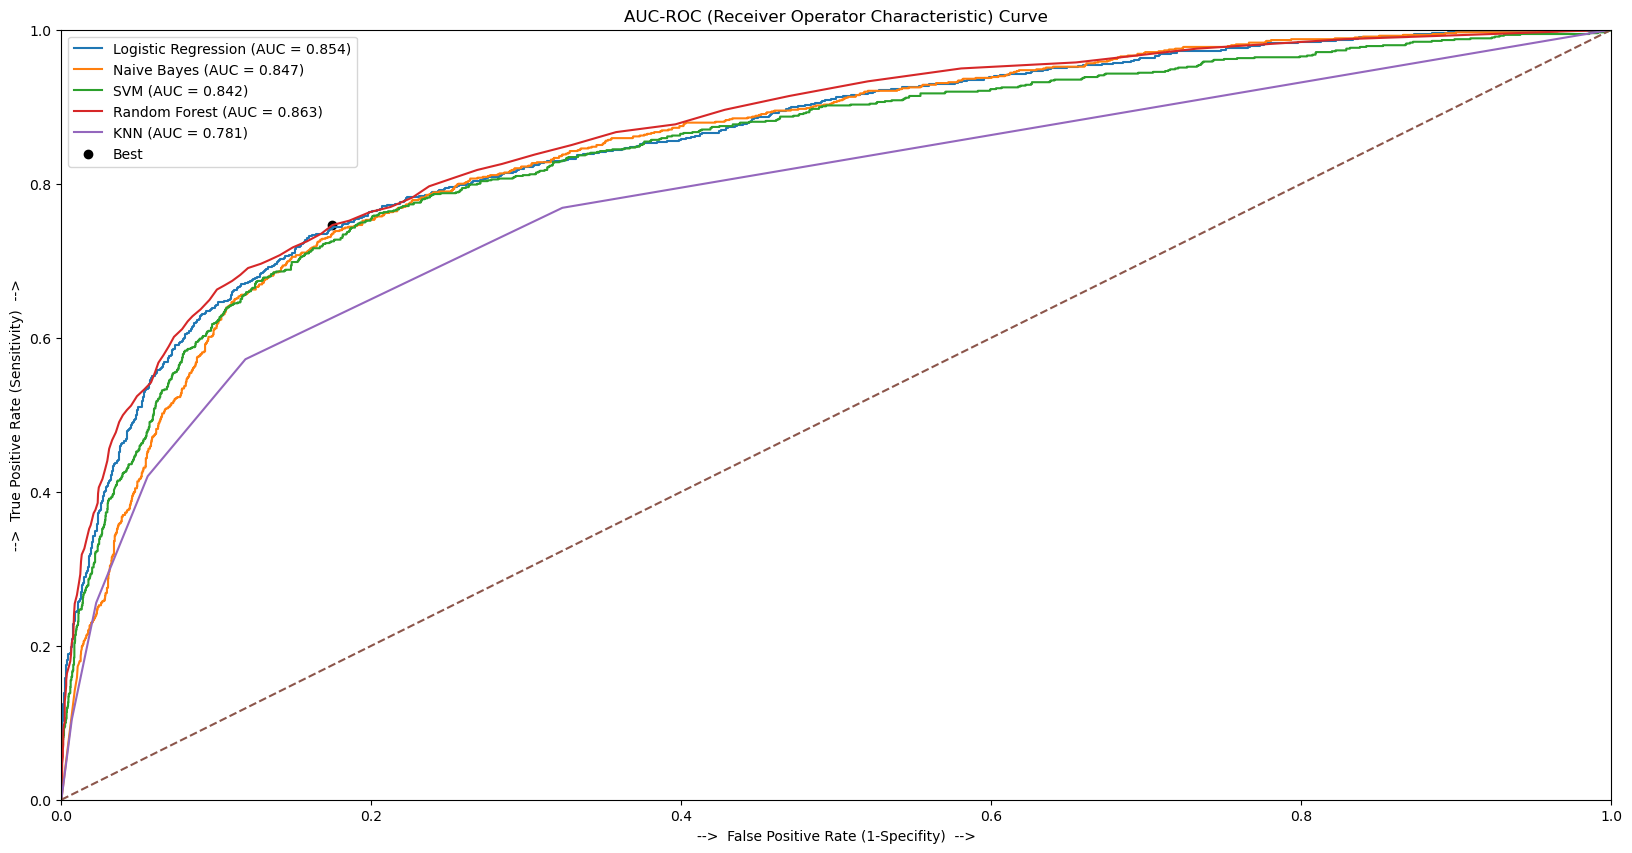

In [79]:
plt.figure(figsize=(20, 10))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {auc_nb:.3f})")
plt.plot(svc_fpr, svc_tpr, label=f"SVM (AUC = {auc_svc:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {auc_knn:.3f})")
plt.plot([0, 1], ls="--")

J = rf_tpr - rf_fpr
ix = np.argmax(J)
best_thresh = rf_threshold[ix]
print(best_thresh)
plt.scatter(rf_fpr[ix], rf_tpr[ix], marker='o', color='black', label='Best')

plt.xlabel("-->  False Positive Rate (1-Specifity)  -->")
plt.ylabel("-->  True Positive Rate (Sensitivity)  -->")
plt.title("AUC-ROC (Receiver Operator Characteristic) Curve")

plt.xlim((0,1))
plt.ylim((0,1))
plt.legend();

## Test Data

In [81]:
df_test2 = df_test.drop(["s53", "id"], axis=1)
df_test2.shape

(85065, 28)

In [82]:
for label, content in df_test2.items():
    if pd.api.types.is_string_dtype(content):
        df_test2[label] = content.astype("category").cat.as_unordered()

for label, content in df_test2.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers
        df_test2[label] = pd.Categorical(df_test2[label]).codes

In [84]:
df_test2.head()

,gender,s11,s12,s13,s16,s17,s18,s48,s52,s58,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,1,1,1,1,1,3,3,0,2,1,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,1,1,1,1,1,2,1,1,2,0,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,1,1,0,1,1,3,1,1,2,1,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,1,1,1,1,3,3,1,0,1,1,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,1,1,1,1,3,2,1,1,1,1,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0


In [86]:
rf.score(X_test, y_test) * 100

87.9157646132651

In [89]:
submit1 = pd.DataFrame()
submit1["id"] = df_test["id"]
submit1["label"] = rf.predict(df_test2)

submit1.shape

(85065, 2)

In [90]:
submit1.head()

,id,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,0
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0


In [91]:
sample_sub.head()

,id,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1


In [92]:
set(submit1.columns) - set(sample_sub.columns)

set()

In [94]:
submit1.to_csv("submission/submit1.csv", index=False)

In [2]:
sub = pd.read_csv("submission/Submission_MaximumLikelihood_4f96et.csv")
sub.shape

(85065, 2)

In [3]:
sub["label"].value_counts()

0    62266
1    22799
Name: label, dtype: int64

(25402, 29)


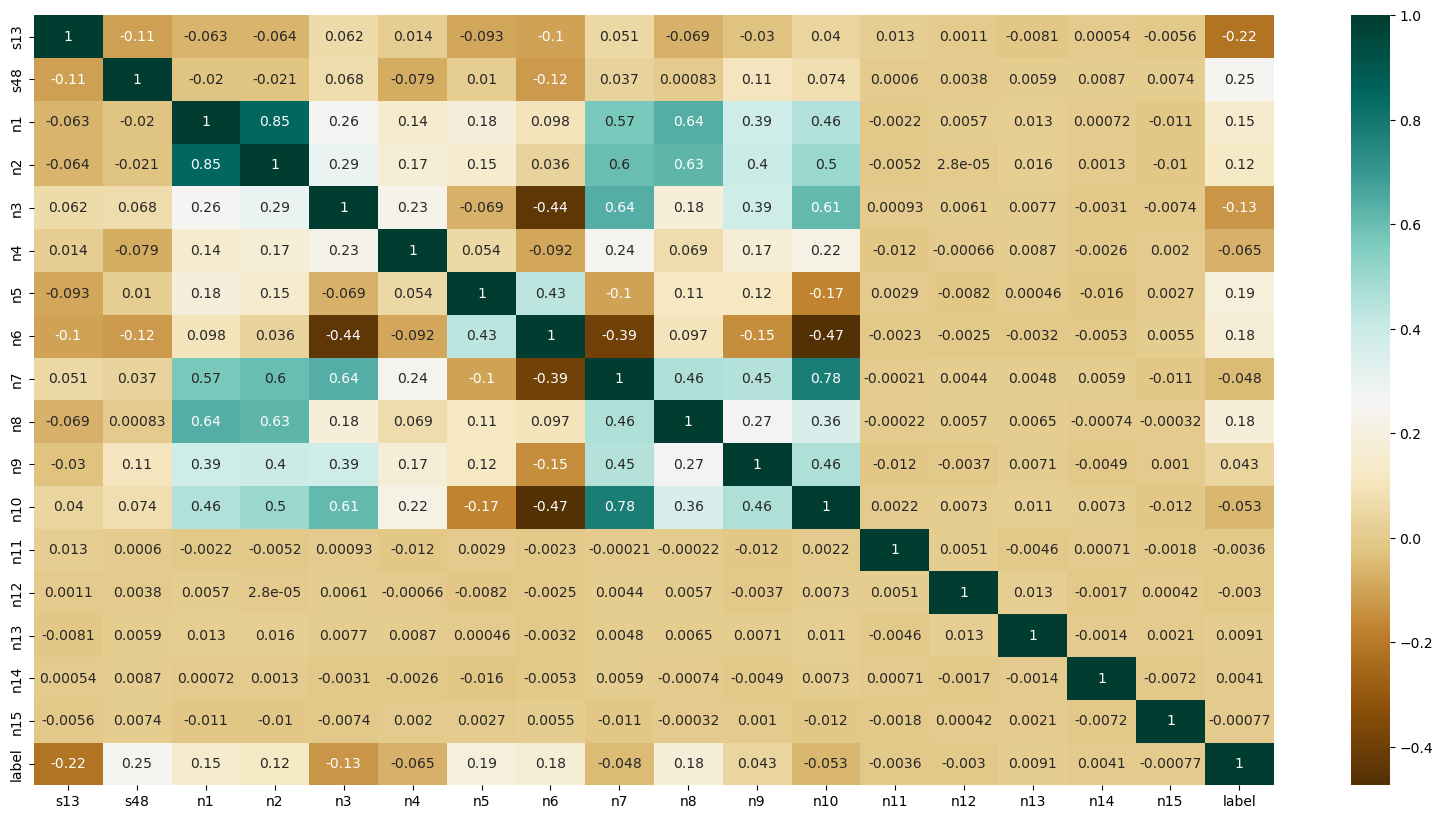

In [102]:
df_corr = df_train2.drop(["id", "s53"], axis=1)
print(df_corr.shape)

plt.figure(figsize=(20,10))
corr = df_corr.corr()
sns.heatmap(corr, cmap="BrBG", annot=True);

In [103]:
corr["label"].sort_values()

s13     -0.218530
n3      -0.131029
n4      -0.065011
n10     -0.053496
n7      -0.047572
n11     -0.003627
n12     -0.003041
n15     -0.000771
n14      0.004072
n13      0.009098
n9       0.042906
n2       0.124107
n1       0.148926
n6       0.176698
n8       0.178586
n5       0.191275
s48      0.247221
label    1.000000
Name: label, dtype: float64

## GridSearch

In [104]:
from sklearn.model_selection import GridSearchCV

In [109]:
%%time

estimator = RandomForestClassifier(n_jobs=-1, random_state=42)
param_distribution = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(2, 10, 2)
}

rf_model = GridSearchCV(estimator,
                        param_distribution,
                        cv=5,
                        verbose=2)

rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END max_depth

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([2, 4, 6, 8]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=2)

In [110]:
rf_model.best_score_

0.8789427342108066

In [111]:
rf_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 60}

In [113]:
rf_2 = RandomForestClassifier(max_depth= 10, min_samples_leaf= 8,
                              min_samples_split = 2, n_estimators = 60)

rf_2.fit(X_train, y_train)
rf_2.score(X_test, y_test)

0.8740405432001574

## Dummies

In [114]:
cat_cols

Index(['id', 'gender', 's11', 's12', 's16', 's17', 's18', 's52', 's53', 's58',
       's69', 's70', 's71'],
      dtype='object')

In [115]:
cat_cols_2 = ['gender', 's11', 's12', 's16', 's17', 's18', 's52', 's58', 's69', 's70', 's71']

In [116]:
df_train2.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6',
       'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

In [118]:
df_train2.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6',
       'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

In [126]:
df_dummy = df_train2.drop(["id", "s53"], axis=1)
df_dummy = pd.get_dummies(df_dummy, columns=cat_cols_2, drop_first=False)
df_dummy.shape

(25402, 54)

In [127]:
df_dummy.columns

Index(['s13', 's48', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9',
       'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label', 'gender_F',
       'gender_M', 's11_N', 's11_Y', 's12_N', 's12_Y', 's16_A', 's16_B',
       's16_C', 's16_D', 's17_A', 's17_B', 's17_C', 's17_D', 's18_A', 's18_B',
       's18_C', 's18_D', 's52_0', 's52_1', 's52_l', 's52_o', 's58_A', 's58_B',
       's69_0', 's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B',
       's70_op: C', 's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d'],
      dtype='object')

In [124]:
df_dummy.head(3)

,s13,s48,n1,n2,n3,n4,n5,n6,n7,n8,...,s58_B,s69_C`,s69_x,s69_~1,s70_op: B,s70_op: C,s70_op: D,s71_b,s71_c,s71_d
0,1,0,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,...,1,0,1,0,0,0,1,1,0,0
1,1,1,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,...,1,0,1,0,0,0,1,1,0,0
2,1,0,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,...,1,0,1,0,0,0,1,1,0,0


In [129]:
df_train2["s48"].unique()

array([0, 1], dtype=int64)

In [130]:
X = df_dummy.copy()
y = df_train2["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
X_train.shape, X_test.shape

((20321, 54), (5081, 54))

In [ ]:
def model_score(model):
    
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    # print(f"The accuracy score achieved using {model_name} is: {score*100:0.2f} %")
    
    return score

In [131]:
%%time
lr = LogisticRegression()
nb = GaussianNB()
svc = SVC(probability=True)
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

model_desc = {"Logstic Regression": lr, "Naive Bayes": nb, "SVC": svc, "Random Forest": rf, "KNN": knn}
scores = {}

for k, v in model_desc.items():
    scores[k] = model_score(v)

Wall time: 4min 44s


In [132]:
pd.DataFrame(scores.items())

,0,1
0,Logstic Regression,1.000000
1,Naive Bayes,1.000000
2,SVC,1.000000
3,Random Forest,1.000000
4,KNN,0.894115


In [ ]:
%%time
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
auc_lr = auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, nb_threshold = roc_curve(y_test, nb.predict_proba(X_test)[:,1], pos_label=1)
auc_nb = auc(nb_fpr, nb_tpr)

svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc.predict_proba(X_test)[:,1], pos_label=1)
auc_svc = auc(svc_fpr, svc_tpr)

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=1)
auc_rf = auc(rf_fpr, rf_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1], pos_label=1)
auc_knn = auc(knn_fpr, knn_tpr)

auc_lr, auc_nb, auc_svc, auc_rf, auc_knn